## Where Do People Drink The Most Beer, Wine And Spirits?

<img src="https://s1.qwant.com/thumbr/0x0/3/f/a2d61eb9aa851a55e62456389bde7986e358da62a08b5c5ac98aaa851447dc/alcoholconsumption.gif?u=http%3A%2F%2F4.bp.blogspot.com%2F-0u5Sk_omAEE%2FTV3XZtyPQ1I%2FAAAAAAAAArc%2FyVlSiUp6aTU%2Fs1600%2Falcoholconsumption.gif&q=0&b=1&p=0&a=1">

The dataset for this analysis is from this post in [FiveThirtyEight](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/)

Data: https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

## Problem 1
Convert the following data into tidy format ([see this for reference](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)) with the headers `country`, `drink` and `servings`. Drop the column `total_litres_of_pure_alcohol`

In [ ]:
csvurl = "https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv"
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
csvurl = "https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv"
# Read the data
drinks = pd.read_csv(csvurl)
drinks.shape
drinks.head()




,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [ ]:

# convert to tidy data
drinks = pd.melt(drinks, id_vars=['country'], var_name="drink", value_name='servings')
drinks
# drop total_litres_of_pure_alcohol
tidy_drinks = drinks[drinks.drink != 'total_litres_of_pure_alcohol']
tidy_drinks
tidy_drinks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 578
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   579 non-null    object 
 1   drink     579 non-null    object 
 2   servings  579 non-null    float64
dtypes: float64(1), object(2)
memory usage: 18.1+ KB


## Problem 2
Remove `"_servings"` from the data in the tidy dataframe in Problem 1. Who drinks the most beer, wine and spirits? Create three categorical plots of your choice to illustrate the top 10 countries that drink the most wine, beer or spirits.

In [ ]:
# remove "_serrvings" from the tidy data
tidy_drinks['drink'] = tidy_drinks['drink'].str.replace('_servings', '')
tidy_drinks

<ipython-input-3-ee9260a523fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_drinks['drink'] = tidy_drinks['drink'].str.replace('_servings', '')


,country,drink,servings
0,Afghanistan,beer,0.0
1,Albania,beer,89.0
2,Algeria,beer,25.0
3,Andorra,beer,245.0
4,Angola,beer,217.0
...,...,...,...
574,Venezuela,wine,3.0
575,Vietnam,wine,1.0
576,Yemen,wine,0.0
577,Zambia,wine,4.0


In [ ]:
#who drinks the most beer?
beer = tidy_drinks[tidy_drinks['drink'] == 'beer']
beer = beer.sort_values('servings', ascending=False)
#list top 10 countries drinoing the most beer
beer.head(10)
#make to list
beer['country'].head(10).to_list()



['Namibia',
 'Czech Republic',
 'Gabon',
 'Germany',
 'Lithuania',
 'Poland',
 'Venezuela',
 'Ireland',
 'Palau',
 'Romania']

In [ ]:
# who drinks the most wine?
wine = tidy_drinks[tidy_drinks['drink'] == 'wine']
wine = wine.sort_values('servings', ascending=False)
#list top 10 countries drinoing the most wine
wine.head(10)
#make to list
wine['country'].head(10).to_list()


['France',
 'Portugal',
 'Andorra',
 'Switzerland',
 'Denmark',
 'Slovenia',
 'Luxembourg',
 'Croatia',
 'Italy',
 'Equatorial Guinea']

In [ ]:
# who drinks the most spirits?
spirit = tidy_drinks[tidy_drinks['drink'] == 'spirit']
spirit.head(10)
spirit = spirit.sort_values('servings', ascending=False)
spirit['country'].head(10).to_list()

['Grenada',
 'Belarus',
 'Haiti',
 'Russian Federation',
 'St. Lucia',
 'Guyana',
 'Slovakia',
 'Dominica',
 'Thailand',
 'Cook Islands']

<ipython-input-7-d3aef4f64de1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='servings', y='country', data=beer.head(10), palette='viridis')


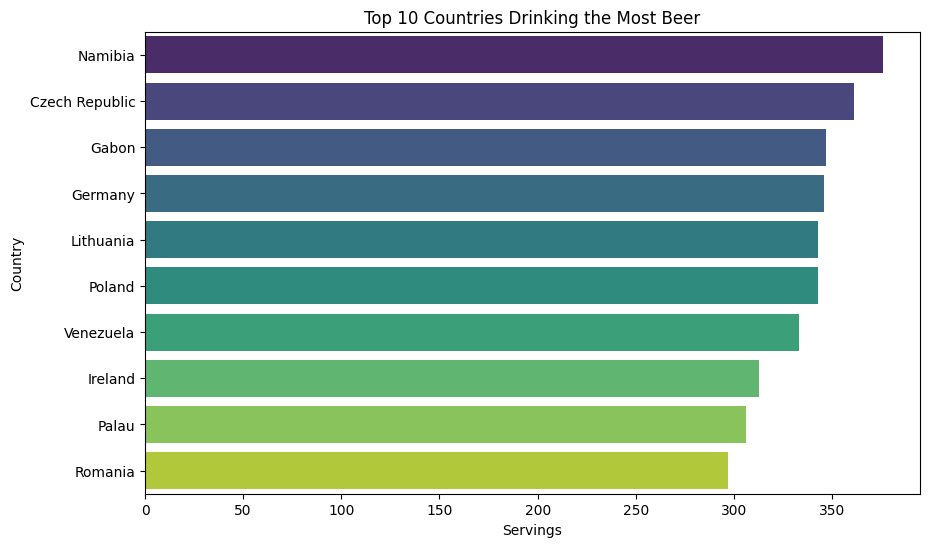

In [ ]:
#three categorical plot of the top 10 countries that drink the most beer, wine, and spirits
#beer
plt.figure(figsize=(10, 6))
sns.barplot(x='servings', y='country', data=beer.head(10), palette='viridis')
plt.title('Top 10 Countries Drinking the Most Beer')
plt.xlabel('Servings')
plt.ylabel('Country')
plt.show()


<ipython-input-8-930adb9e8fe8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='servings', y='country', data=wine.head(10), palette='viridis')


Text(0, 0.5, 'Country')

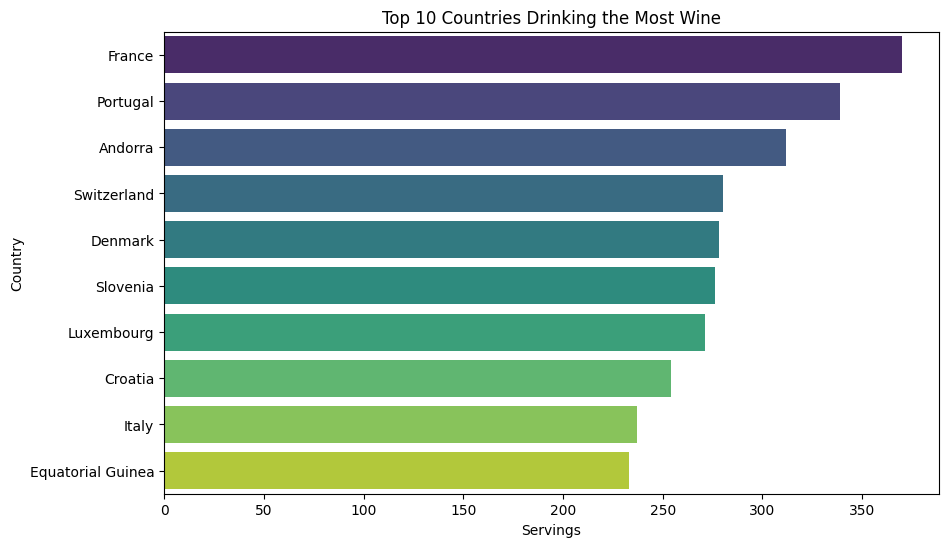

In [ ]:
#top 10 countries that drink the most wine
plt.figure(figsize=(10, 6))
sns.barplot(x='servings', y='country', data=wine.head(10), palette='viridis')
plt.title('Top 10 Countries Drinking the Most Wine')
plt.xlabel('Servings')
plt.ylabel('Country')

## Problem 3
Create a wide dataframe using `pivot_table` with the tidy dataframe from Problem 2

In [ ]:
wide_drinks = tidy_drinks.pivot_table(index=['drink'], columns='country', values='servings')
wide_drinks

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
drink,,,,,,,,,,,,,,,,,,,,,
beer,0.0,89.0,25.0,245.0,217.0,102.0,193.0,21.0,261.0,279.0,...,16.0,219.0,115.0,25.0,21.0,333.0,111.0,6.0,32.0,64.0
spirit,0.0,132.0,0.0,138.0,57.0,128.0,25.0,179.0,72.0,75.0,...,135.0,126.0,35.0,101.0,18.0,100.0,2.0,0.0,19.0,18.0
wine,0.0,54.0,14.0,312.0,45.0,45.0,221.0,11.0,212.0,191.0,...,5.0,195.0,220.0,8.0,11.0,3.0,1.0,0.0,4.0,4.0
